# Import libraries and set up parallel jobs

In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This cell sets up the dask parallelism.
# When working with high-resolution data, make sure to 
# request large amount of memory and processes. Also,
# make sure the adjust the parameters passed to PBSCluster()
# Specifically, change your project ID accordingly.

import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client

# Setup your PBSCluster
cluster = PBSCluster(
    cores=16, # The number of cores you want
    memory='300GB', # Amount of memory
    processes=16, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    #resource_spec='select=1:ncpus=8:mem=50GB', # Specify resources
    project='P93300012', # Input your project ID here
    walltime='02:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)

cluster.scale(2)
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})
client = Client(cluster)

In [3]:
client

Client Scheduler: tcp://10.12.206.49:38629 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/altuntas/proxy/41542/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


# POP2 history dataset:

In [4]:
casename = "g.e20.G.TL319_t13.control.001"
archive_path = "/glade/campaign/collections/cmip/CMIP6/iHESP/FOSI/HR/"+casename+"/ocn/hist/"

In [5]:
# list of surface fields to be plotted
sfc_fields = ['SSH', 'SHF', 'SFWF', 'TAUX', 'TAUY', 'EVAP_F', 'PREC_F',
              'SNOW_F', 'MELT_F', 'ROFF_F', 'SALT_F', 'SENH_F', 'LWUP_F', 
              'LWDN_F', 'MELTH_F', 'HBLT', 'HMXL']

In [6]:
ds = xr.open_mfdataset(
        paths = "{}/{}.pop.h.00??-??.nc".format(archive_path, casename),
        data_vars = 'minimal',
        coords = 'minimal',
        #compat = 'override',
        parallel = True,
        decode_cf = False,
        preprocess=lambda ds: ds[sfc_fields] # load the surface fields only
)
ds = xr.decode_cf(ds)

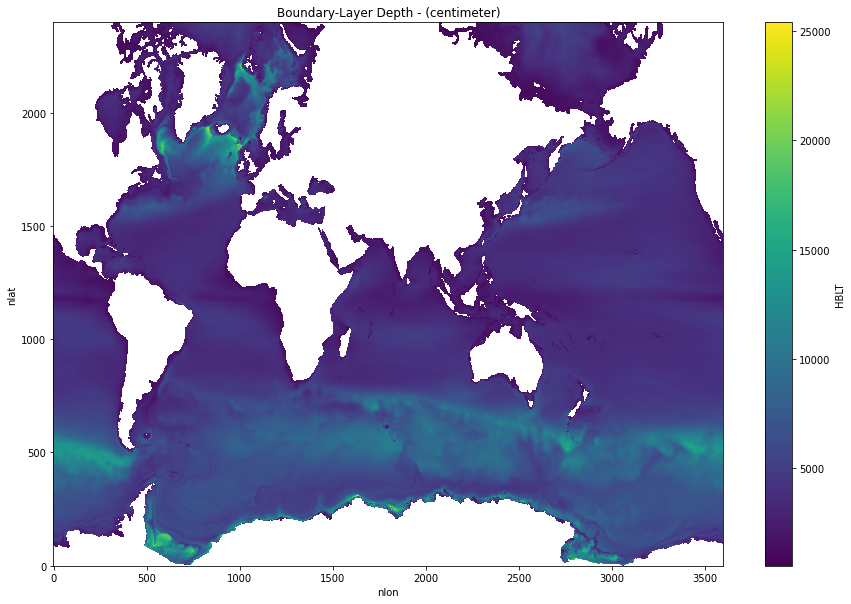

In [7]:
# Plot the mean SST (last 20 years):
ds.HBLT.isel(time=slice(-241,-1)).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.HBLT.long_name, ds.HBLT.units));

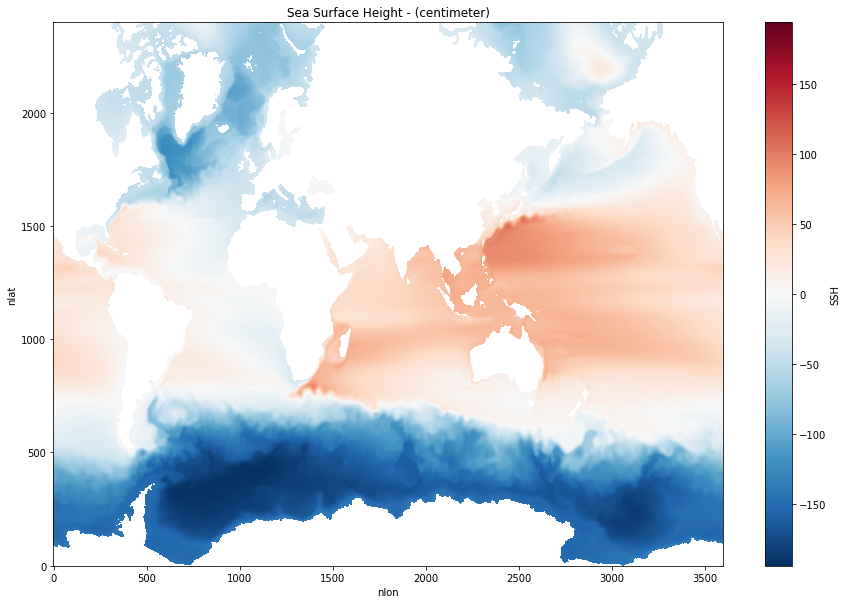

In [8]:
# Plot the mean SST (last 20 years):
ds.SSH.isel(time=slice(-241,-1)).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.SSH.long_name, ds.SSH.units));

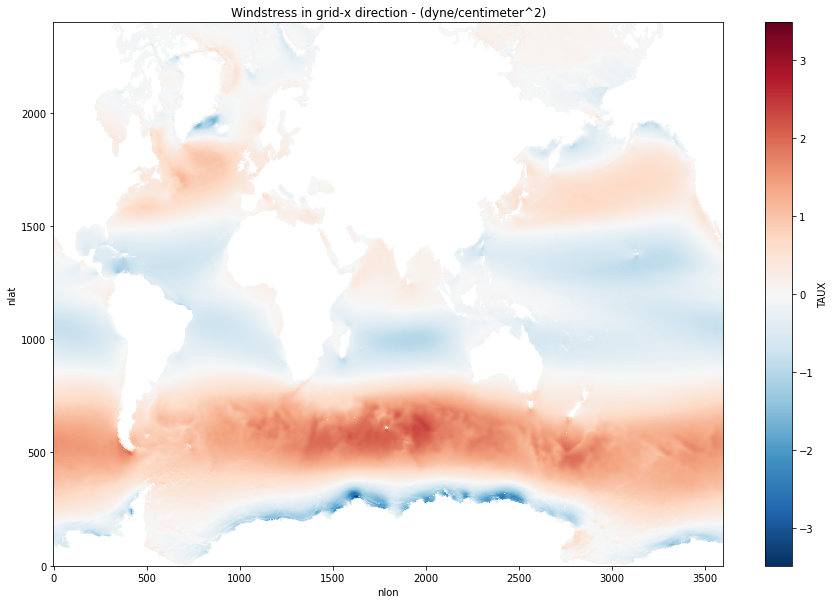

In [9]:
# Plot the mean SST (last 20 years):
ds.TAUX.isel(time=slice(-241,-1)).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.TAUX.long_name, ds.TAUX.units));

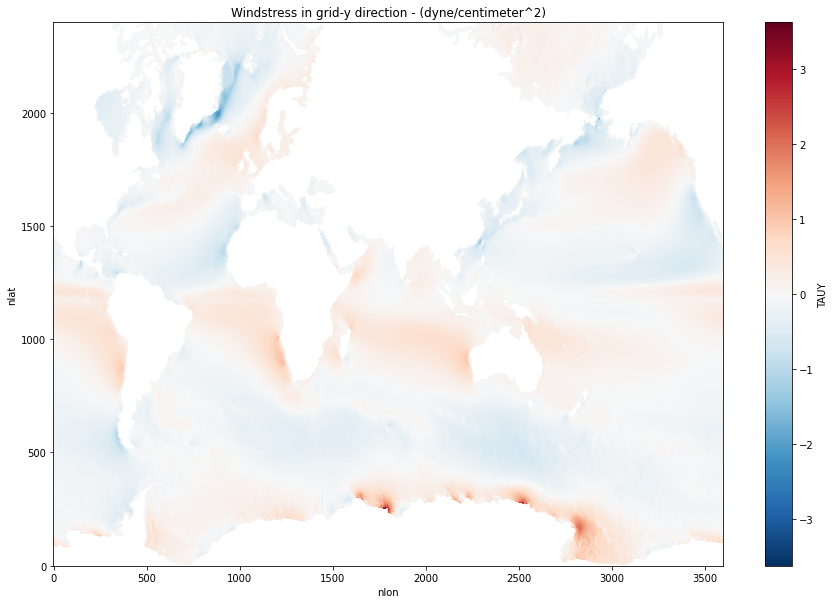

In [10]:
# Plot the mean SST (last 20 years):
ds.TAUY.isel(time=slice(-241,-1)).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.TAUY.long_name, ds.TAUY.units));

# POP2 3d fields:

In [11]:
# list of surface fields to be plotted
fields_3d = ['TEMP', 'SALT']

In [12]:
ds = xr.open_mfdataset(
        paths = "{}/{}.pop.h.00??-??.nc".format(archive_path, casename),
        data_vars = 'minimal',
        coords = 'minimal',
        #compat = 'override',
        parallel = True,
        decode_cf = False,
        preprocess=lambda ds: ds[fields_3d] # load the surface fields only
)
ds = xr.decode_cf(ds)

## TEMP and SALT at 5m:

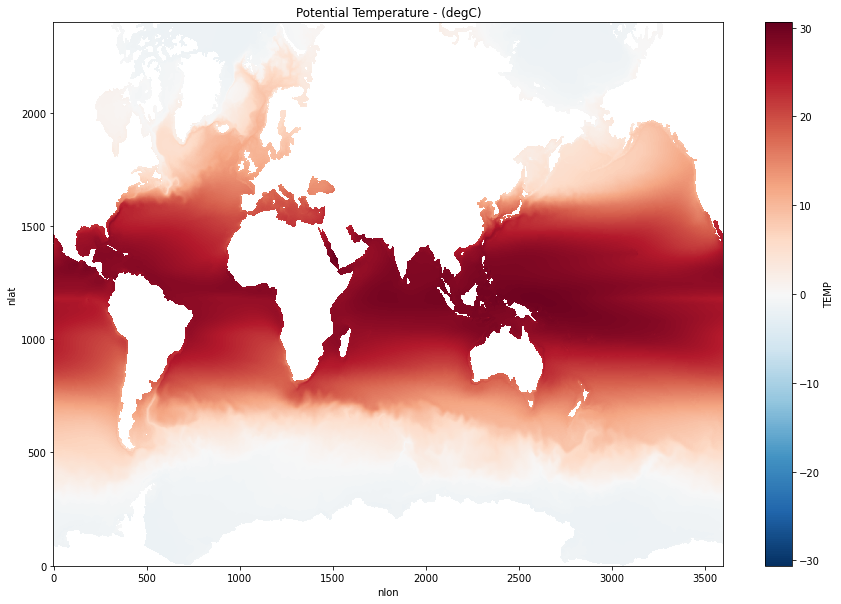

In [13]:
# Plot the mean SST (last 20 years):
ds.TEMP.isel(time=slice(-241,-1)).sel(z_t=500).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.TEMP.long_name, ds.TEMP.units));

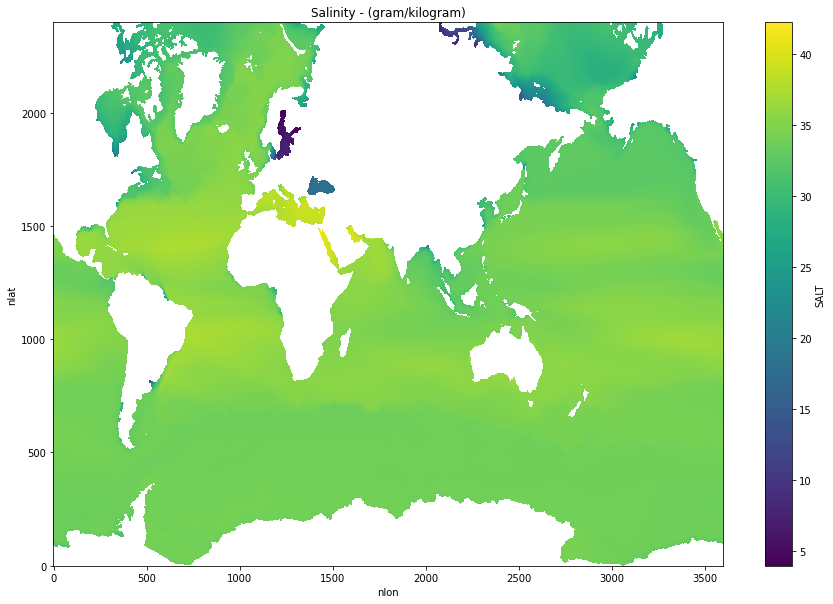

In [14]:
# Plot the mean SST (last 20 years):
ds.SALT.isel(time=slice(-241,-1)).sel(z_t=500).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.SALT.long_name, ds.SALT.units));

## TEMP and SALT at 95m:

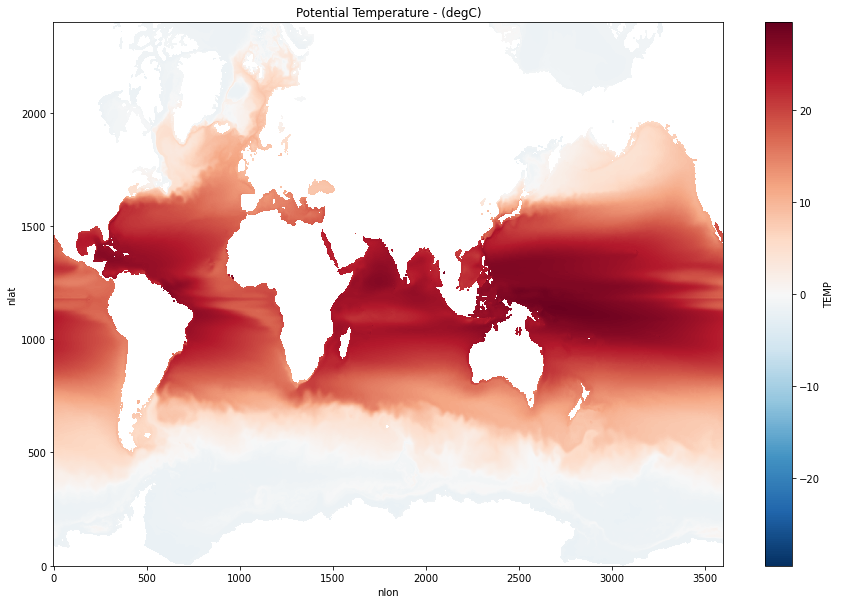

In [15]:
# Plot the mean SST (last 20 years):
ds.TEMP.isel(time=slice(-241,-1)).sel(z_t=9500).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.TEMP.long_name, ds.TEMP.units));

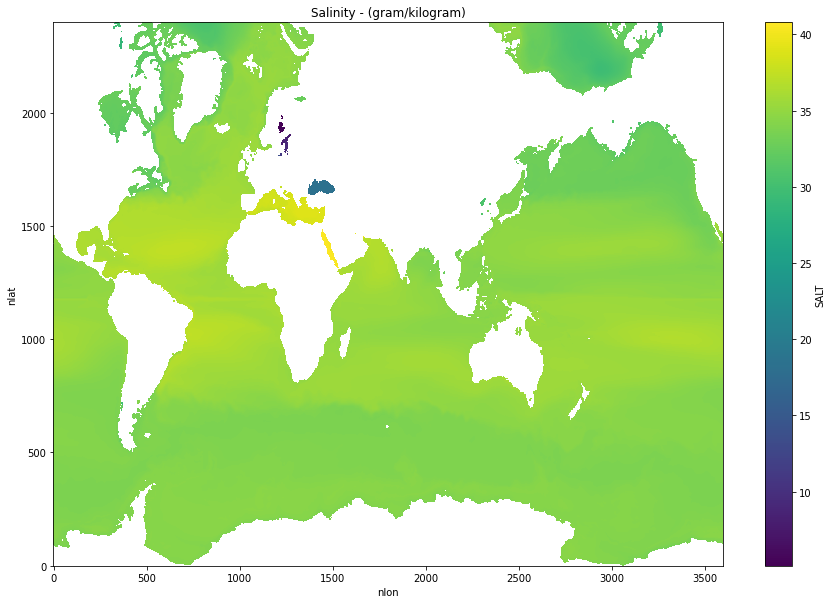

In [16]:
# Plot the mean SST (last 20 years):
ds.SALT.isel(time=slice(-241,-1)).sel(z_t=9500).mean(dim='time').plot(size=10)
plt.title("{} - ({})".format(ds.SALT.long_name, ds.SALT.units));